In [18]:
import sys

In [19]:
sys.dont_write_bytecode = True

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle

from PoissonMixtureModel import PoissonMixtureModel

In [21]:
np.random.seed(0)

In [22]:
N = 100000

print(f'Número de Observações: {N}')

Número de Observações: 100000


In [23]:
M = 3

print(f'Número de Categorias Latentes: {M}')

Número de Categorias Latentes: 3


In [24]:
PI = np.repeat(1/M, repeats = M)

print(f'Distribuição das Categorias Latentes:\n')

print(PI)

Distribuição das Categorias Latentes:

[0.33333333 0.33333333 0.33333333]


In [25]:
ALPHA = np.random.multinomial(n = 1, pvals = PI, size = N).sum(axis = 0)

print(f'Número de Observações por Categoria Latente:\n')

print(ALPHA)

Número de Observações por Categoria Latente:

[33501 33238 33261]


In [26]:
MU = [1, 10, 20]

print(f'Médias por Categoria Latente:\n')

print(MU)

Médias por Categoria Latente:

[1, 10, 20]


In [27]:
X, Z = [], []

for m in range(M):

    X.append(

        np.random.poisson(

            lam = MU[m],

            size = ALPHA[m]

        )

    )

    Z.append(

        np.repeat(

            m,

            repeats = ALPHA[m]

        )

    )

X, Z = np.hstack(X), np.hstack(Z)

X, Z = shuffle(X, Z)

In [28]:
print('Observações:\n')

print(X)

Observações:

[10  2  3 ... 26 33  1]


In [29]:
print('Categorias Latentes:\n')

print(Z)

Categorias Latentes:

[1 0 0 ... 2 2 0]


In [30]:
DATA = pd.DataFrame(data = {'Observação': X, 'Categoria Latente': Z})

DATA.head()

,Observação,Categoria Latente
0,10,1
1,2,0
2,3,0
3,16,1
4,0,0


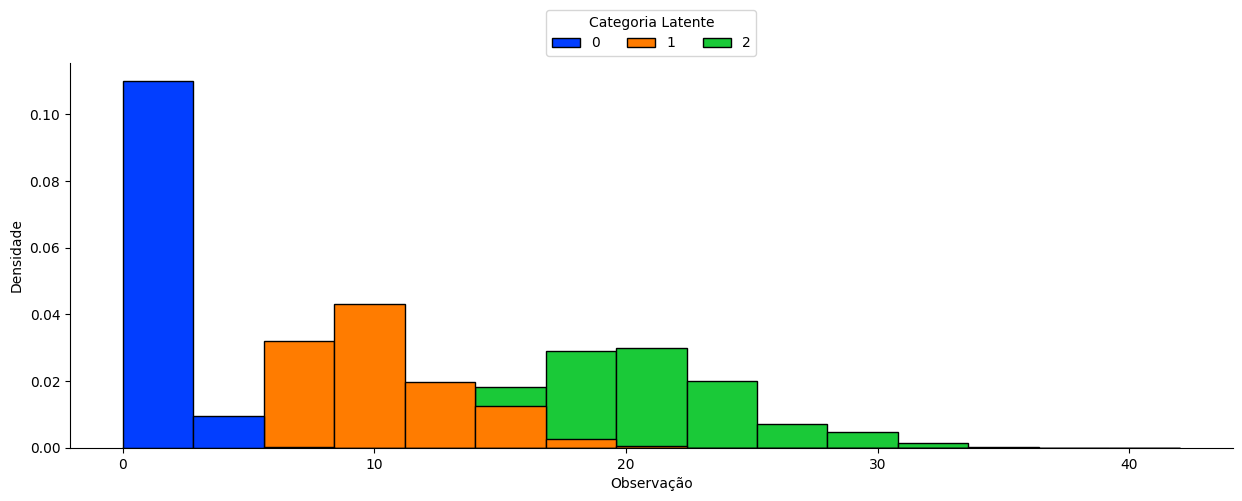

In [31]:
plt.figure(figsize = (15, 5))

GRAPHIC = sns.histplot(

    data = DATA, x = 'Observação', 
    
    hue = 'Categoria Latente', 
    
    stat = 'density', bins = 15, 
    
    palette = 'bright', alpha = 1

)

GRAPHIC.spines['right'].set_visible(False)

GRAPHIC.spines['top'].set_visible(False)

plt.ylabel('Densidade')

sns.move_legend(

    GRAPHIC, 'lower center',

    bbox_to_anchor = (0.5, 1), ncol = 5
    
)

plt.show()

In [32]:
PMM = PoissonMixtureModel(X = X, M = M)

PMM.update_model()

In [33]:
print(PMM.gamma)

[[4.34203752e-02 7.83450070e-07 9.56578841e-01]
 [2.13477491e-06 9.87529058e-01 1.24688073e-02]
 [3.84113496e-05 8.88274830e-01 1.11686759e-01]
 ...
 [9.99686672e-01 2.74423670e-26 3.13328462e-04]
 [9.99997625e-01 2.14183789e-35 2.37476145e-06]
 [1.07929918e-07 9.98733567e-01 1.26632556e-03]]


In [34]:
print(PMM.eta)

[20.0263686   1.00114815  9.9694646 ]
